# Live Code 2
- Muhammad Nafisa Fakhri
- FTDS Batch 013

## Problem 1

Kamu sedang mencari rumah dan akan memilih satu dari dua pilihan rumah dengan harga yang cukup berbeda. Sekilas, kedua rumah sama karakteristiknya, namun kamu ingin memastikan kembali apakah rumah yang lebih mahal patut dibeli atau tidak. Berikut data kedua rumah:

In [3]:
import numpy as np

In [4]:
rumah_1 = np.array([100,240,1,1,1,0,1,1])
rumah_2 = np.array([120,200,1,1,1,1,1,1])
print(rumah_1)
print(rumah_2)

[100 240   1   1   1   0   1   1]
[120 200   1   1   1   1   1   1]


Perhitungan nilai cosine similarity

In [5]:
cosine_sim = (rumah_1@rumah_2)/(np.linalg.norm(rumah_1)*np.linalg.norm(rumah_2))
cosine_sim

0.9894062123807504

### Pertanyaan Analisis

1. Apakah kedua rumah mirip? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)? Dan keputusan yang akhirnya kamu pilih, rumah 1 atau rumah 2? apa pertimbangannya?
- Berdasarkan nilai cosine simmilarity, kedua rumah tersebut mirip dikarenakan nilai dari cosine similarity dari kedua rumah tersebut mendekati nilai 1 (0.9894062123807504). Keputusan yang diambil adalah untuk membeli rumah 2 dikarenakan di setiap kolom terdapat nilai yang mengartikan fasilitas dari rumah tersebut lengkap, dan jika ditinjau dari harga, harga yang termurah terdapat pada rumah 2.

2. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?
- cosine similarity merupakan nilai dari cosinus yang terbentuk antara vektor 1 dan vektor 2. Jika nilai dari cosinus mendekati nilai 1, maka mengartikan bahwa sudut antara vektor 1 dan vektor 2 semakin kecil. Jika sudut yang terbentuk semakin kecil bahwa vektor 1 dan vektor 2 akan semakin mirip, dikarenakan konsep cosinus adalah nilai dari bayangan yang terbentuk dari suatu vektor.

3. Mengapa cosine similarity harus melibatkan vektor bukan matriks?
- Karena cosine similarity hanya bisa terbentuk dari vektor, dalam artian bahwa vektor adalah sesuatu yang memiliki nilai dan arah. sementara matrix hanya mempunyai nilai saja.

## Problem 2

Pengambilan data daerah North Dakota dari data geo_us_boundaries dengan menggunakan SQL

Syntax SQL : 
```
SELECT * 
FROM `bigquery-public-data.geo_us_boundaries.states` 
WHERE state_name = "North Dakota";
```

In [18]:
import pandas as pd
from scipy import integrate
from scipy.integrate import trapz
import re
import matplotlib.pyplot as plt

In [8]:
# Loading data
data_mentah = pd.read_csv("h8dsft_P0LC2_mnfakhri.csv.csv")
data_mentah

,geo_id,region_code,division_code,state_fips_code,state_gnis_code,state,state_name,lsad_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,int_point_lat,int_point_lon,int_point_geom,state_geom
0,38,2,4,38,1779797,ND,North Dakota,0,G4000,A,178695635183,4411365971,47.442174,-100.460826,POINT(-100.4608258 47.442174),"POLYGON((-104.044968 47.330141, -104.044967 47..."


Pengolahan data mentah untuk mendapatkan nilai koordinat longitude dan latitude dari wilayah North Dakota

In [22]:
def data_preprocess(data_mentah):
   long = []
   lat = []
   for row in data_mentah["state_geom"][0].split(", "):
     row = re.sub("MULTIPOLYGON","",row)
     row = re.sub("POLYGON","",row)
     row = re.sub(r"\(","",row)
     row = re.sub(r"\)","",row)
     long.append(float(row.split(" ")[0]))
     lat.append(float(row.split(" ")[1]))
   return pd.DataFrame({"long":long,"lat":lat}).sort_values("long",ascending=True)

In [27]:
koor_dakota = data_preprocess(data_mentah)
koor_dakota

,long,lat
31375,-104.049012,48.932658
31373,-104.049009,48.933599
31374,-104.049004,48.933072
31401,-104.048992,48.917648
31402,-104.048990,48.917458
...,...,...
4641,-96.554447,46.083757
4645,-96.554436,46.084186
4642,-96.554424,46.083827
4643,-96.554416,46.083899


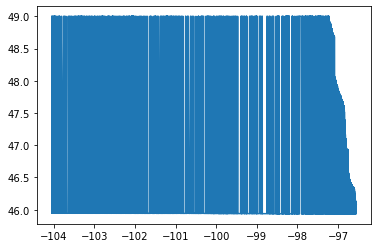

In [29]:
plt.plot(koor_dakota.long,koor_dakota.lat)

Mencari batas untuk menentukan daerah utara dan selatan Dakota

In [30]:
median_lat = koor_dakota.lat.median()
median_lat

47.261749

Perhitungan luas daerah utara Dakota dan daerah selatan Dakota

In [33]:
area_utara = koor_dakota[koor_dakota.lat > median_lat]
area_selatan = koor_dakota[koor_dakota.lat <= median_lat]

luas_area_utara = trapz(area_utara.lat, area_utara.long)
luas_area_selatan = trapz(area_selatan.lat, area_selatan.long)

print(luas_area_utara)
print(luas_area_selatan)

353.4146307006304
344.38970468807264


Perhitungan luas daerah Dakota

In [34]:
luas_dakota = luas_area_utara - luas_area_selatan
luas_dakota

9.024926012557785

Visualisasi dari daerah North Dakota dengan batas dari nilai median latitude

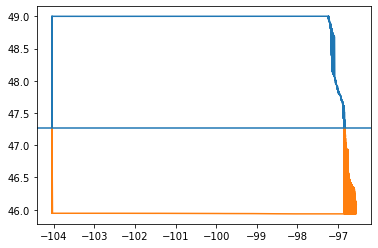

In [36]:
plt.plot(area_utara.long , area_utara.lat)
plt.plot(area_selatan.long , area_selatan.lat)
plt.axhline(median_lat)

### Pertanyaan Analisis

1. Integral jenis apa yang diterapkan pada kasus ini? (Tertentu/Tak tentu) dan mengapa demikian? berikan alasan!
- Integral yang digunakan dalam studi kasus ini adalah integral tertentu yang merupakan jenis integral yang memiliki nilai batas atas dan batas bawah. dalam studi kasus ini kita ingin menghitung luas suatu daerah yang dimana terdapat batas dalam perhitungan daerah tersebut, yaitu batas luar dari daerah. maka dari itu integral yang digunakan dalam kasus ini adalah integral terentu dengan batas.

2. Untuk kasus ini, metode apa yang kamu pakai dalam perhitungan integral? secara simbolik atau numerik, dan mengapa?
- Dalam kasus ini metode yang digunakan untuk perhitungan integral adalah integral secara numerik. Hal ini dikarenakan untuk penghitung luas suatu daerah, diperlukan nilai-nilai batas yang dimana berupa numerik, sehingga metode integral yang digunakan adalah integral numerik.

3. Library Scipy menyediakan banyak function/modul untuk menghitung integral. Function apa yang kamu gunakan dan berikan alasan yang logis!
- Libary scipy yang digunakan untuk studi kasus ini adalah menggunakan integrate trapezoid, karena untuk perhitungan luas daerah itu dengan cara menggunakan integral (fungsi integrate) dan bentuk yang dihasilkan dari daerah tersebut menyerupai trapesium (fungsi trapezoid), maka dalam kasus ini menggunakan libary scipy integrate trapezoid.